In [ ]:
#!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


##import some basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.shape

(10000, 14)

##divide dataset into independent and dependent features

In [ ]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## feature engineering

In [ ]:
geography=pd.get_dummies(X["Geography"],drop_first=True)

In [ ]:
geography=geography.astype(int)

In [ ]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
gender=gender.astype(int)

In [ ]:
X=X.drop(["Geography","Gender"],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


##concatenate the variables

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


##splitting the dataset as training and  testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

##ANN implimentation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import PReLU,ReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialize ANN
classifier=Sequential()

In [ ]:
# input layer
classifier.add(Dense(units=11,activation="relu"))

In [ ]:
#first hidden layer
classifier.add(Dense(units=8,activation='relu'))

In [ ]:
#second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
## output layer
classifier.add(Dense(1,activation="sigmoid"))

In [ ]:
## train the model
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

##to set user defined learning rate

In [ ]:
##opt=tf.keras.optimizers.Adam(learning_rate=0.01)
##classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

##Early stopping

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
model=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.5376 - accuracy: 0.7852 - val_loss: 0.4659 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4429 - accuracy: 0.7996 - val_loss: 0.4361 - val_accuracy: 0.8058
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4224 - accuracy: 0.8162 - val_loss: 0.4228 - val_accuracy: 0.8175
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4082 - accuracy: 0.8326 - val_loss: 0.4104 - val_accuracy: 0.8239
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3943 - accuracy: 0.8349 - val_loss: 0.4018 - val_accuracy: 0.8254
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3821 - accuracy: 0.8416 - val_loss: 0.3906 - val_accuracy: 0.8292
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.8492 - val_loss: 0.3833 - val_accuracy: 0.8338

In [ ]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

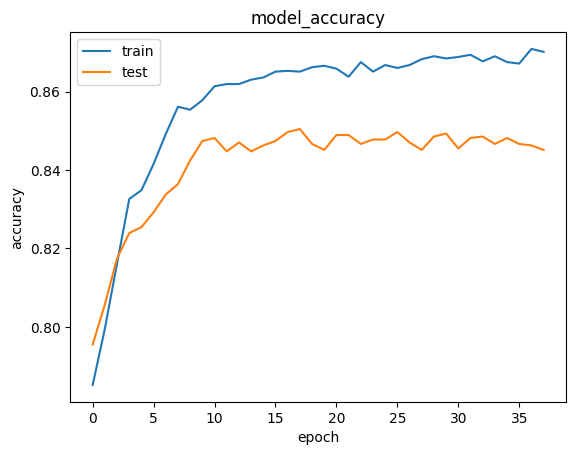

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

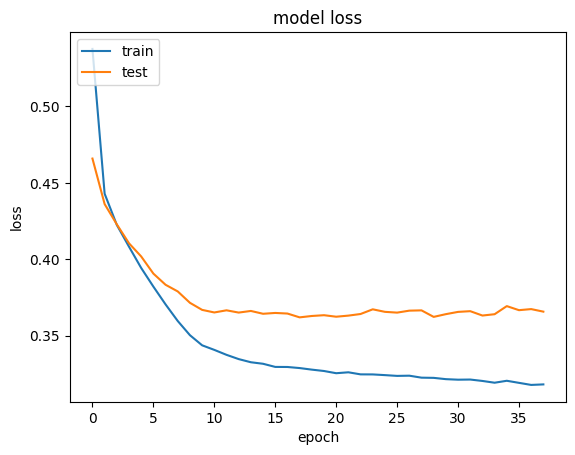

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1512,   83],
       [ 198,  207]])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8595

In [ ]:
classifier.get_weights()

[array([[ 0.34955126,  0.34567517,  0.6127357 ,  0.1059445 ,  0.21142666,
          0.6912052 , -0.09494652,  0.21745017,  0.08394329, -0.3207784 ,
         -0.2616683 ],
        [ 0.79438484,  0.2409061 ,  0.09864137,  0.18201125,  0.1248033 ,
         -0.20395176, -0.38461468, -0.7629425 ,  0.6145453 ,  0.06540194,
         -0.8408124 ],
        [ 0.2201146 , -0.17012058,  0.11938202,  0.05990916,  0.05932595,
         -0.21808715,  0.20626369, -0.06030018, -0.11304418,  0.12705736,
          0.07810672],
        [-0.02695868,  0.36140105,  0.16107869, -0.14600916,  0.5354502 ,
         -0.37599927, -0.05859524,  0.05230084, -0.14378318, -0.6223937 ,
         -0.38493368],
        [-0.10726012,  0.6907116 , -0.01787594, -1.2149076 ,  0.8617502 ,
         -0.00551871, -0.18192485, -0.1846097 ,  0.25340837,  0.93714964,
          0.12023517],
        [ 0.10082074, -0.23485315,  0.34149584,  0.05265422,  0.07570516,
         -0.24013306, -0.1780583 ,  0.0912753 , -0.19162601,  0.2007359